<a href="https://colab.research.google.com/github/drstannwoji2019/ML_Projects/blob/main/AnimalIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries
import torch  # Core PyTorch library
import torchvision  # Models and vision utilities
from torchvision import transforms  # Preprocessing
from PIL import Image  # For image loading and handling
import requests  # To fetch images from the internet
from io import BytesIO  # For image reading from memory
import matplotlib.pyplot as plt  # For displaying images
import matplotlib.patches as patches  # To draw bounding boxes


Image loaded successfully!


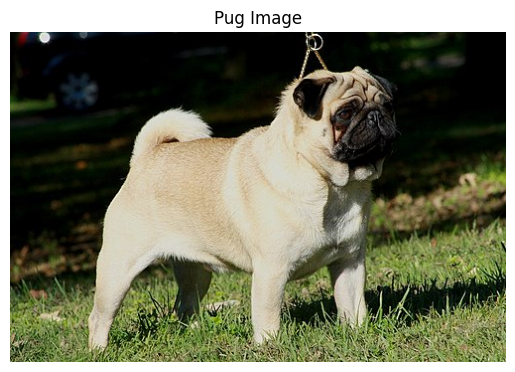

In [ ]:
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import requests
import matplotlib.pyplot as plt

# ✅ Working image URL (from Dog CEO API)
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Mops-duke-mopszucht-vom-maegdebrunnen.jpg/500px-Mops-duke-mopszucht-vom-maegdebrunnen.jpg"

# Download the image
response = requests.get(url)

try:
    img = Image.open(BytesIO(response.content)).convert('RGB')
    print("Image loaded successfully!")
    plt.imshow(img)
    plt.axis('off')
    plt.title("Pug Image")
    plt.show()
except UnidentifiedImageError:
    print("Error: The URL did not return a valid image.")


In [ ]:
# Preprocess the Image for the Model
# Convert the image into a tensor format
transform = transforms.Compose([
    transforms.ToTensor()  # Converts PIL Image to PyTorch tensor (0-1 range)
])

# Apply the transformation
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

In [ ]:
# Load the Pre-Trained Faster R-CNN Model
# Load Faster R-CNN pretrained on COCO dataset
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Set the model to evaluation mode
model.eval()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 79.5MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Run the Object Detector
# Disable gradient calculations (for faster and cleaner inference)
with torch.no_grad():
    predictions = model(img_tensor)  # Run detection


In [ ]:
# Define COCO Class Labels
# Class labels from the COCO dataset used by the model
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


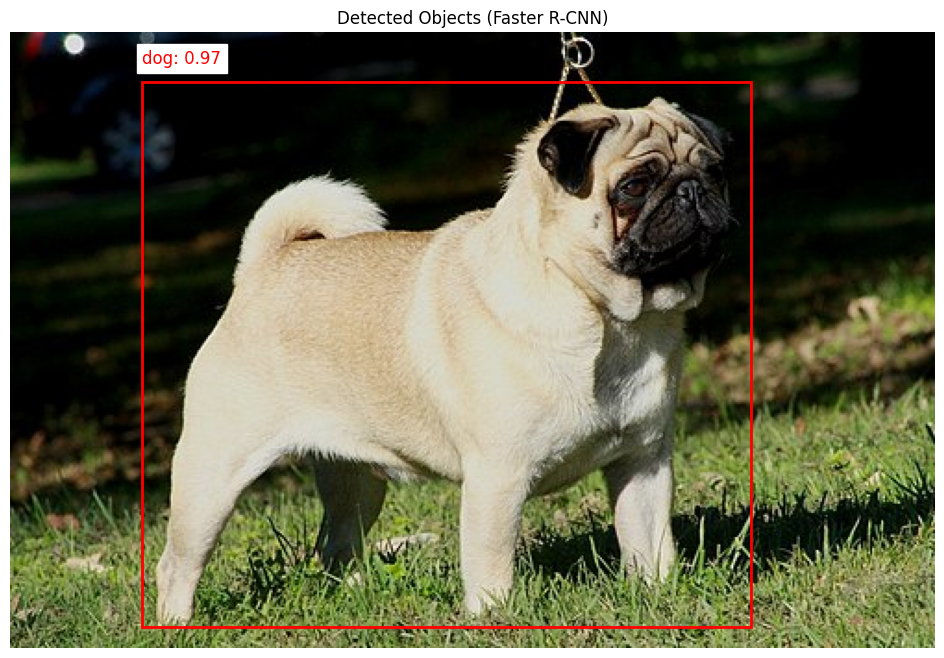

In [ ]:
# Visualize the Detected Objects
# Create a plot to show the image and bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)

# Draw boxes and labels for high-confidence predictions
for i, box in enumerate(predictions[0]['boxes']):
    score = predictions[0]['scores'][i].item()  # Confidence
    label_idx = predictions[0]['labels'][i].item()  # Class ID
    if score > 0.6:  # Only show confident detections
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        label = COCO_INSTANCE_CATEGORY_NAMES[label_idx]
        ax.text(xmin, ymin - 10, f"{label}: {score:.2f}", color='red',
                fontsize=12, backgroundcolor='white')

plt.title("Detected Objects (Faster R-CNN)")
plt.axis("off")
plt.show()